In [1]:
## 導入所需的套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
## 導入數據集
dataset = pd.read_csv("data/linear_regression_dataset_sample.csv")
X = dataset.iloc[:,1].values.reshape([-1,1])
y = dataset.iloc[:,2].values

## 將數據集拆成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42) 
# test_size 測試集比例, 70% 30%
# random_state 隨機數種子, 保證每次拆分結果相同, 便於結果復現, 默認 None, 每次拆分結果不同
# random_state = 0, 42, 100, 2020, 2021, 2022, 2023, 2024 ...


In [3]:
X_train.shape, X_test.shape

((40, 1), (18, 1))

In [4]:
## 訓練與建構迴歸模型
regressor = LinearRegression() # 
regressor.fit(X_train, y_train) # 訓練模型

## 計算出截距值與係數值
w_0 = regressor.intercept_ # 截距值, b
w_1 = regressor.coef_ # 係數值, w ; w[0] = w_1; 特徵權重

print('Interception : ', w_0)
print('Coeficient : ', w_1)

Interception :  9756.049713545246
Coeficient :  [27498.50867371]


In [5]:
## 迴歸模型的準確度
score = regressor.score(X_test, y_test) # R^2
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.9092086290908565
Accuracy: 90.92086290908566%


In [6]:
y1 = regressor.predict([[14.3]]) # 預測值
print(y1)

[402984.72374765]


In [ ]:
## 拿訓練好的迴歸模型,預測測試集資料的目標值(依變數)
y_pred = regressor.predict(X_test)

print('Predict : ', y_pred)

Predict :  [ 42754.260122    81252.1722652  248993.07517486 125249.78614314
 306739.94338965 386485.61854342 262742.32951171 196745.9086948
 328738.75032863 119750.0844084  345237.85553285  53753.66359149
 257242.62777697 232493.96997063 106000.83007154 155498.14568423
  86751.87399994  67502.91792834]


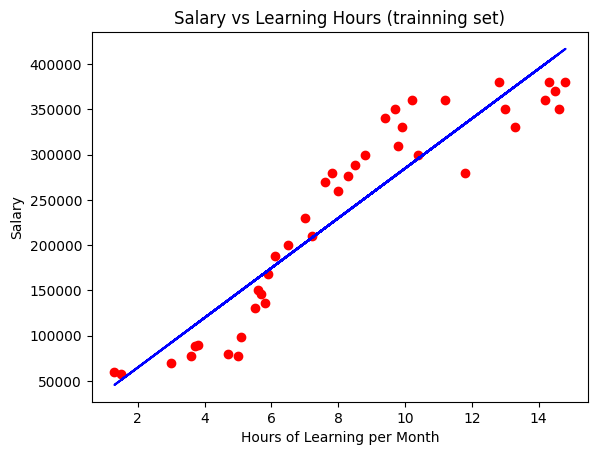

In [8]:
## 視覺化迴歸模型與訓練集的關聯
plt.scatter(X_train, y_train, color = 'red') # 散佈圖
plt.plot(X_train, regressor.predict(X_train), color = 'blue') # 迴歸線
plt.title('Salary vs Learning Hours (trainning set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()

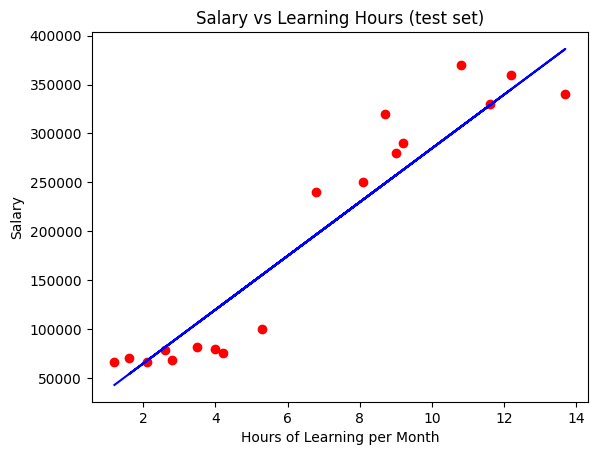

In [ ]:
## 視覺化迴歸模型與測試集的關聯
plt.scatter(X_test, y_test, color = 'red') # 散佈圖, X_test, y_test
plt.plot(X_test, regressor.predict(X_test), color = 'blue') # 迴歸線
plt.title('Salary vs Learning Hours (test set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()